# **Problem Statement**

Unemployment is measured by the unemployment rate which is the number of people who are unemployed as a percentage of the total labour force. We have seen a sharp increase in the unemployment rate during Covid-19. So, the analysis intends to shed light on the socio-economic consequences of the pandemic on India's workforce and labor market.


This dataset aids in comprehending the unemployment dynamics across India's states during the COVID-19 crisis. It offers valuable insights into how the unemployment rate, employment figures, and labor participation rates have been impacted across different regions in the country.



In [1]:
#Filtering the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

In [5]:
#Reading the data set
df = pd.read_csv('/archive (1).zip')

In [6]:
#Seeing the first five rows
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [7]:
df.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855
266,West Bengal,31-10-2020,M,9.98,33962549,45.63,East,22.9868,87.855


# Exploratory Data Analysis


In [8]:
df.shape

(267, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [10]:
#Checking for null percentage

round(df.isnull().sum()/df.shape[0]*100,2)

,0
Region,0.0
Date,0.0
Frequency,0.0
Estimated Unemployment Rate (%),0.0
Estimated Employed,0.0
Estimated Labour Participation Rate (%),0.0
Region.1,0.0
longitude,0.0
latitude,0.0


In [12]:
# Delecting the null rows

df.dropna(inplace = True)

df.shape


(267, 9)

In [13]:
#checking for null percentage

df.isnull().sum()/df.shape[0]


,0
Region,0.0
Date,0.0
Frequency,0.0
Estimated Unemployment Rate (%),0.0
Estimated Employed,0.0
Estimated Labour Participation Rate (%),0.0
Region.1,0.0
longitude,0.0
latitude,0.0


In [14]:
# We shall rename the columns for easier access
df = df.rename(columns={' Date' : 'Date',' Frequency': 'Frequency' ,' Estimated Unemployment Rate (%)' : 'Est_Unemp_Rate', ' Estimated Employed' : 'Est_Emp_Rate',
                          ' Estimated Labour Participation Rate (%)' : 'Est_Labour_Rate'}).reset_index(drop = True)


# Rounding estimated employed column for a better visualizing

df['Est_Emp_Rate'] = round((df['Est_Emp_Rate']/1000000),2)

df.head()

,Region,Date,Frequency,Est_Unemp_Rate,Est_Emp_Rate,Est_Labour_Rate,Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16.64,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16.55,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15.88,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11.34,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12.99,36.46,South,15.9129,79.74


In [15]:
# Changing the dtype of 'Date' column

df['Date'] = pd.to_datetime(df['Date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Region           267 non-null    object        
 1   Date             267 non-null    datetime64[ns]
 2   Frequency        267 non-null    object        
 3   Est_Unemp_Rate   267 non-null    float64       
 4   Est_Emp_Rate     267 non-null    float64       
 5   Est_Labour_Rate  267 non-null    float64       
 6   Region.1         267 non-null    object        
 7   longitude        267 non-null    float64       
 8   latitude         267 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 18.9+ KB


In [16]:
#checking if there are no duplicate rows in the data set

df.duplicated().sum()

0

In [17]:
# Important to note that there is a typo in the 'Frequency' column

df.Frequency.value_counts()


,count
Frequency,
M,267


In [18]:
df.columns

Index(['Region', 'Date', 'Frequency', 'Est_Unemp_Rate', 'Est_Emp_Rate',
       'Est_Labour_Rate', 'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [19]:
df = df.drop(['Frequency'],axis = 1)

df.shape


(267, 8)

In [20]:
#We shall create a new column for year and month to analyse the between 2019 and 2020

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df.head()

,Region,Date,Est_Unemp_Rate,Est_Emp_Rate,Est_Labour_Rate,Region.1,longitude,latitude,Year,Month
0,Andhra Pradesh,2020-01-31,5.48,16.64,41.02,South,15.9129,79.74,2020,1
1,Andhra Pradesh,2020-02-29,5.83,16.55,40.90,South,15.9129,79.74,2020,2
2,Andhra Pradesh,2020-03-31,5.79,15.88,39.18,South,15.9129,79.74,2020,3
3,Andhra Pradesh,2020-04-30,20.51,11.34,33.10,South,15.9129,79.74,2020,4
4,Andhra Pradesh,2020-05-31,17.43,12.99,36.46,South,15.9129,79.74,2020,5


In [35]:
#Analyzing the Region column
df.Region.value_counts()

,count
Region,
Andhra Pradesh,10
Assam,10
Uttarakhand,10
Uttar Pradesh,10
Tripura,10
Telangana,10
Tamil Nadu,10
Rajasthan,10
Punjab,10


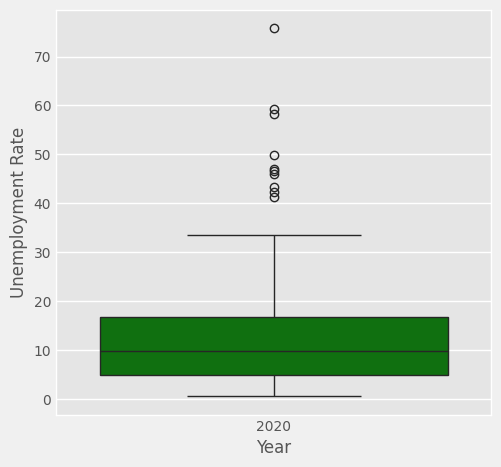

In [38]:
#Analysing the Unemployment Rate column
plt.figure(figsize=(5,5))
plt.style.use('ggplot')
sns.boxplot(y = df['Est_Unemp_Rate'], x = df['Year'], color ='green')
plt.ylabel('Unemployment Rate')
plt.show()



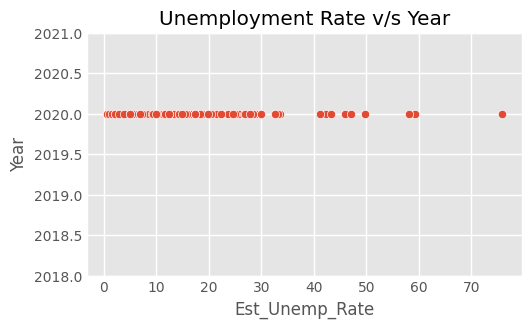

In [39]:
plt.figure(figsize=(5,3))
plt.style.use('ggplot')
sns.scatterplot(x = df['Est_Unemp_Rate'], y = df['Year'])
plt.ylim(2018,2021)
plt.title('Unemployment Rate v/s Year')
plt.show()

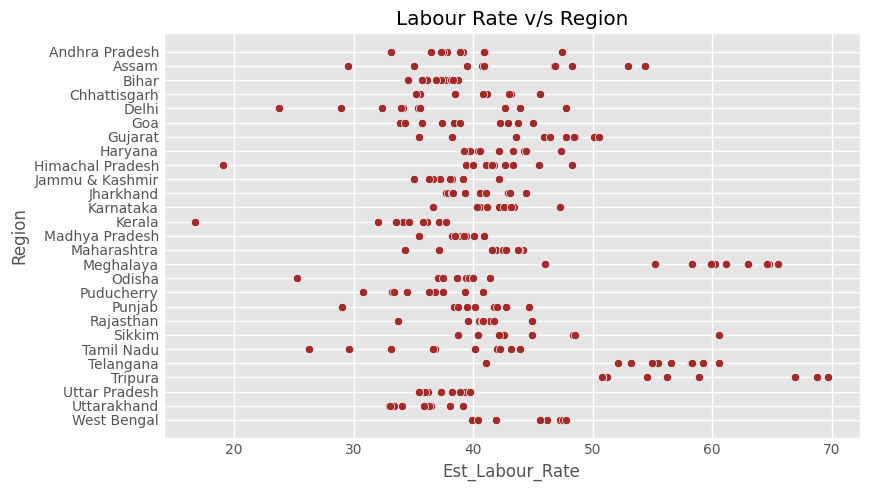

In [40]:
plt.figure(figsize=(8,5))
plt.style.use('ggplot')
sns.scatterplot(x = df['Est_Labour_Rate'], y = df['Region'], color = 'brown')
plt.title('Labour Rate v/s Region')
plt.show()

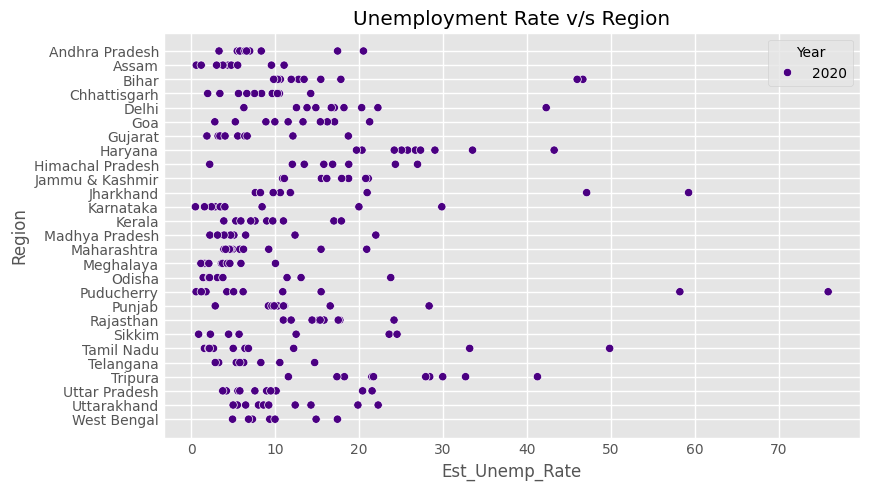

In [41]:
plt.figure(figsize=(8,5))
plt.style.use('ggplot')
sns.scatterplot(x = df['Est_Unemp_Rate'], y = df['Region'], hue = df['Year'], palette =['indigo','orange'])
plt.title('Unemployment Rate v/s Region')
plt.show()